In [1]:
import xgboost
import numpy as np
import pandas as pd 
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [3]:
data = pd.read_csv('Data/xgboost_classification.csv', sep=';')
data

,age,response
0,23,0
1,45,0
2,44,0
3,20,0
4,49,0
5,56,1
6,55,1
7,43,1
8,23,0
9,67,0


In [4]:
data['age'][(data['age'] < 25) | (data['age'] > 50)] = np.nan

In [5]:
data

,age,response
0,NaN,0
1,45.0,0
2,44.0,0
3,NaN,0
4,49.0,0
5,NaN,1
6,NaN,1
7,43.0,1
8,NaN,0
9,NaN,0


In [6]:
y = data['response']

In [7]:
X = data.drop('response', axis=1)

In [8]:
dtrain = xgboost.DMatrix(data=X, label=y)

/Users/ivan/Desktop/Computer Science/Gewissta/code/module7/.venv/lib/python3.9/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/ivan/Desktop/Computer Science/Gewissta/code/module7/.venv/lib/python3.9/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/ivan/Desktop/Computer Science/Gewissta/code/module7/.venv/lib/python3.9/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/ivan/Desktop/Computer Science/Gewissta/code/module7/.venv/lib/python3.9/site-packages/xgboost/data.py:359: FutureWarn

In [9]:
params = {
    'max_depth':1,
    'eta': 1.0,
    'objective':'binary:logistic',
    'lambda':0,
    'eval_metric':'logloss',
    'seed':42,
    'base_score':.5
}

In [10]:
model = xgboost.train(params=params,
                      num_boost_round=1,
                      dtrain=dtrain)

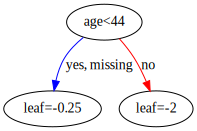

In [11]:
xgboost.to_graphviz(model, num_trees=0)

In [12]:
const = np.array([0.5] * 20)

In [13]:
data['const'] = const

In [14]:
grad_0 = data['const'] - data['response']

In [15]:
hess_0 = data['const'] * (1 - data['const'])

In [16]:
data['grad_0'] = grad_0
data['hess_0'] = hess_0

In [17]:
data

,age,response,const,grad_0,hess_0
0,NaN,0,0.5,0.5,0.25
1,45.0,0,0.5,0.5,0.25
2,44.0,0,0.5,0.5,0.25
3,NaN,0,0.5,0.5,0.25
4,49.0,0,0.5,0.5,0.25
5,NaN,1,0.5,-0.5,0.25
6,NaN,1,0.5,-0.5,0.25
7,43.0,1,0.5,-0.5,0.25
8,NaN,0,0.5,0.5,0.25
9,NaN,0,0.5,0.5,0.25


In [18]:
eta = 1.0
lambda_ = 0

In [19]:
G_left = data[(data['age'] < 43.5) | (
    data['age'].isnull())].sum()['grad_0']

In [21]:
H_left = data[(data['age'] < 43.5) | (
    data['age'].isnull())].sum()['hess_0']

In [22]:
weight_left = eta * (-(G_left - (H_left + lambda_)))


In [23]:
G_left

1.0

In [24]:
H_left

4.0

In [25]:
weight_left

3.0

In [26]:
G_right = data[(data['age'] >= 43.5) | (
    data['age'].isnull())].sum()['grad_0']
H_right = data[(data['age'] >= 43.5) | (
    data['age'].isnull())].sum()['hess_0']

weight_right = eta * (-(G_right / (H_right + lambda_)))

In [28]:
G_right

3.5

In [29]:
H_left

4.0

In [30]:
gamma = 0
score_left = (G_left ** 2) / (H_left + lambda_)
score_right = (G_right ** 2) / (H_right + lambda_)

In [31]:
G_total = data['grad_0'].sum()
H_total = data['hess_0'].sum()

In [32]:
score_total = (G_total ** 2 ) / (H_total + lambda_)
gain_split = (score_left + score_right) - score_total - gamma

In [34]:
gain_split

1.7166666666666666